In [29]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [30]:
img_array = cv2.imread("Training/0/Training_44626307.jpg")  # this reads the image

In [31]:
img_array.shape     # this tells you the size of the image

(48, 48, 3)

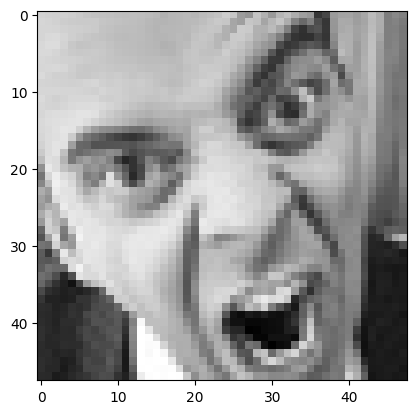

In [32]:
plt.imshow(img_array)   # this shows the image

In [33]:
data_directory = "Training/"    # this is going to be our training dataset

In [34]:
classes = ["0", "1", "2", "3", "4", "5", "6"]   # this is the list of classes -> this has to be the exact name of the training folders

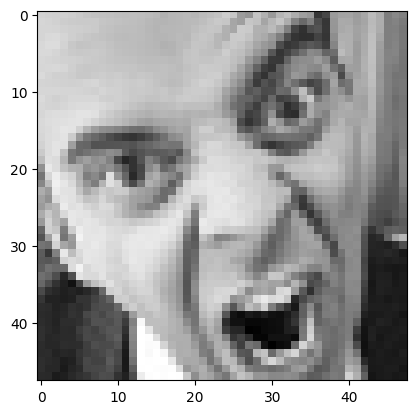

In [35]:
# this will read the entire training directory that we 
# have and it should show just the first picture in each directory
for category in classes:
    path = os.path.join(data_directory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

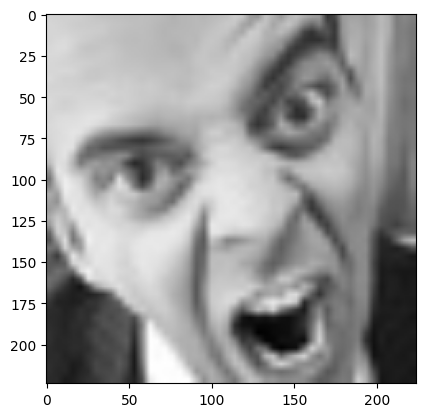

In [36]:
# this changes the size of the original images(48x48) to 
# ImageNet(a popular and new database of pictures) size which is (224x224)
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
new_array.shape

(224, 224, 3)

In [38]:
# this is going to read all the images and we are going to resize them 
# into imageNet size and put them in an array called training_data

training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [39]:
create_training_data()

In [40]:
print(len(training_data))

16126


In [57]:
# the reason why we're randomizing our data is because our
# deep learning model should not learn the sequence
import random

random.shuffle(training_data)

In [58]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)  # converting the data into 4 dimensions

In [59]:
X.shape # now we changed it into 4 dimensions where we have (images, size, size, 3 color channel rgb)

(16126, 224, 224, 3)

In [60]:
# we normalize the data

X = X/255.0

# Dividing the pixel values by 255 normalizes the data to a range between 0 and 1,
# which is useful for several reasons. 
# For example, it helps the model to converge faster during training, 
# and it also ensures that the input data is on the same scale, 
# which can improve the accuracy of the model. Additionally, 
# it helps to avoid numerical overflow or underflow issues that 
# can occur when working with large or small values.

In [61]:
Y[0]    # randomized label based on the class numbers. Y currently is a list

4

In [63]:
Y = np.array(Y)
Y.shape

(16126,)

In [67]:
# We will now make the deep learning model for training our data - This is a type of learning called Transfer Learning

import tensorflow as tf
from tensorflow import keras
from keras import layers

In [69]:
model = tf.keras.applications.MobileNetV2() # This is a pre-trained model